# Read Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A=pd.read_csv("C:/Users/STC/Downloads/training_set.csv")
B=pd.read_csv("C:/Users/STC/Downloads/testing_set.csv")

# Data Preview

In [3]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
B.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing Data Treatement

In [7]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
A.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

For Loan_Amount_term we can not replace missing data by mean, by doing this it will create different value

In [10]:
A["Loan_Amount_Term"]=A["Loan_Amount_Term"].fillna(A["Loan_Amount_Term"].mode()[0])

In [11]:
B["Loan_Amount_Term"]=B["Loan_Amount_Term"].fillna(B["Loan_Amount_Term"].mode()[0])

In [12]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        x=A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        x=A[i].mean()
        A[i]=A[i].fillna(x)

In [13]:
for i in B.columns:
    if(B[i].dtypes=="object"):
        x=B[i].mode()[0]
        B[i]=B[i].fillna(x)
    else:
        x=B[i].mean()
        B[i]=B[i].fillna(x)

In [14]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# EDA

In [16]:
cat_list=A[["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]]

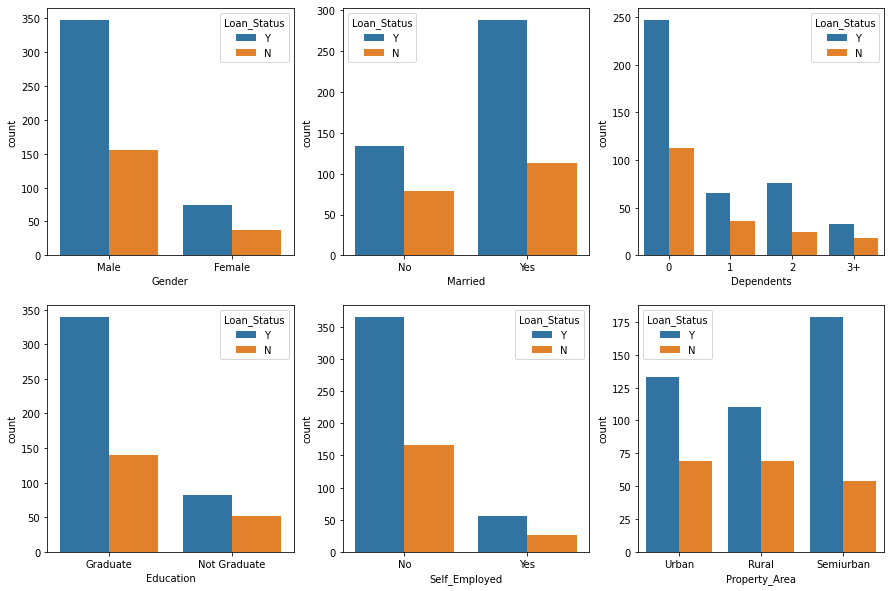

In [17]:
plt.figure(figsize=(15,10))
x=1
for i in cat_list:
    plt.subplot(2,3,x)
    sb.countplot(x=i,hue="Loan_Status",data=A)
    x=x+1

from the above EDA we got to learn that high count of loan approval for
who are male
Who are married
who has no dependents.
who are graduated
who are not self employed

# Prolem Statement 1 checking eligibility of the Customer

In [18]:
A1=A
B1=B

In [19]:
A1["Total_income"]=A1["ApplicantIncome"]+A1["CoapplicantIncome"]
B1["Total_income"]=B1["ApplicantIncome"]+B1["CoapplicantIncome"]

In [20]:
A1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,5849.00000
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,6913.54085
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,3000.00000


In [21]:
B1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800


In [22]:
A1=A1.drop(labels=["ApplicantIncome","CoapplicantIncome"],axis=1)
B1=B1.drop(labels=["ApplicantIncome","CoapplicantIncome"],axis=1)

# Define X AND Y

In [23]:
Y=A1[["Loan_Status"]]
X=A1.drop(labels=["Loan_Status","Loan_ID"],axis=1)

# Preprocessing or one hot encoding

In [24]:
Xnew=pd.get_dummies(X)

In [25]:
Xnew

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,1.0,5849.00000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,128.000000,360.0,1.0,6913.54085,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,66.000000,360.0,1.0,3000.00000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.000000,360.0,1.0,4941.00000,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,141.000000,360.0,1.0,6000.00000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,2900.00000,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,40.000000,180.0,1.0,4106.00000,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,253.000000,360.0,1.0,8312.00000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,187.000000,360.0,1.0,7583.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# Spliting the data

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model1:LR

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=21)
model=lr.fit(xtrain,ytrain)
ts_pred=model.predict(xtest)
tr_pred=model.predict(xtrain)
from sklearn.metrics import accuracy_score
tr_acclr=accuracy_score(tr_pred,ytrain)
ts_acclr=accuracy_score(ts_pred,ytest)
print(tr_acclr,ts_acclr)

0.8024439918533605 0.7967479674796748


# Model 2: KNC

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
model=knc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
tr_accknc=accuracy_score(tr_pred,ytrain)
ts_accknc=accuracy_score(ts_pred,ytest)
print(tr_accknc,ts_accknc)

0.7556008146639511 0.6178861788617886


# Model 3:DTC

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=21)
model=dtc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
tr_accdtc=accuracy_score(tr_pred,ytrain)
ts_accdtc=accuracy_score(ts_pred,ytest)
print(tr_accdtc,ts_accdtc)

1.0 0.6747967479674797


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=21)
model=dtc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
tr_accdtc=accuracy_score(tr_pred,ytrain)
ts_accdtc=accuracy_score(ts_pred,ytest)
print(tr_accdtc,ts_accdtc)

1.0 0.6991869918699187


# ABC

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=21,max_depth=2)
abc=AdaBoostClassifier(dtc,n_estimators=100)
model=abc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_accABC=accuracy_score(ytrain,tr_pred)
ts_accABC=accuracy_score(ytest,ts_pred)
print(tr_accABC,ts_accABC)

1.0 0.7235772357723578


# RFC

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=21)
model=rfc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_accRFC=accuracy_score(ytrain,tr_pred)
ts_accRFC=accuracy_score(ytest,ts_pred)
print(tr_accRFC,ts_accRFC)

1.0 0.7804878048780488


# Overfitting observed(Pruning)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=150,max_depth=2)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_accRFC=accuracy_score(ytrain,tr_pred)
ts_accRFC=accuracy_score(ytest,ts_pred)
tr_accRFC,ts_accRFC

(0.8085539714867617, 0.8211382113821138)

# GridSearchCV for hyperparameters

In [34]:
tg={"max_depth":range(2,20,1),"n_estimators":range(2,200,10)}
rfc=RandomForestClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 5, 'n_estimators': 72}

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=42,max_depth=5)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8370672097759674, 0.8130081300813008)

In [36]:
tg={"min_samples_leaf":range(2,20,1),"n_estimators":range(2,200,10)}
rfc=RandomForestClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 5, 'n_estimators': 62}

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=52,min_samples_leaf=5)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8187372708757638, 0.8048780487804879)

In [38]:
tg={"min_samples_split":range(2,20,1),"n_estimators":range(2,200,10)}
rfc=RandomForestClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 18, 'n_estimators': 22}

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=32,min_samples_split=18)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
tr_acc,ts_acc

(0.8431771894093686, 0.8048780487804879)

RFC with min_samples_leaf=4 & n_estimators=52 is the best model

# Final Random Forest Classification model using above best parameter grid and passing whole training data

# test Data preparation

In [40]:
k=B1.drop(labels=["Loan_ID"],axis=1)

In [41]:
Knew=pd.get_dummies(k)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,max_depth=4,min_samples_leaf=4,n_estimators=32)
rfc_model_final = rfc.fit(Xnew,Y)

In [43]:
loan_status = pd.DataFrame(rfc_model_final.predict(Knew),columns=["Loan_Status"])
pred_1 =B.join(loan_status)[["Loan_ID","Loan_Status"]]

In [44]:
pred_1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [45]:
pred_1.to_csv("Desktop/submissions1.csv")

# Problem Statement 2
If customer is not eligible for the input required amount and duration:
#a.)what can be amount for the given duration.(Regression)

take a data whose loan has been rejected

In [46]:
D=A[A.Loan_Status=='Y']

In [47]:
E=B.join(loan_status)
E=E[E.Loan_Status=="N"]

In [48]:
D.shape

(422, 14)

In [49]:
E.shape

(59, 14)

In [50]:
D.index=range(0,422,1)
E.index=range(0,59,1)

In [51]:
D.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income'],
      dtype='object')

In [52]:
E.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_income',
       'Loan_Status'],
      dtype='object')

# Remove Insignificant columns

In [53]:
M=D.drop(labels=["Loan_ID","Loan_Status"],axis=1)
N=E.drop(labels=["Loan_ID","Loan_Status","LoanAmount"],axis=1)

# Define X&Y

In [54]:
Y=M[["LoanAmount"]]
X= M.drop(labels=["LoanAmount"],axis=1)
R=N

In [55]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [56]:
cat1 = []
con1 = []
for i in R.columns:
    if(R[i].dtypes=="object"):
        cat1.append(i)
    else:
        con1.append(i)

# Preprocessing

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1=pd.get_dummies(X[cat])
Z1=pd.get_dummies(R[cat1])
X2= pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Z2= pd.DataFrame(ss.fit_transform(R[con1]),columns=con1)
Xnew= X1.join(X2)
Znew= Z1.join(Z2)

# Spilt the data 

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# KNR Model

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
model=knr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(35.07429224476702, 48.862146263910965)

# DTR

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.0, 62.833227344992046)

# RFR

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=21)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(13.889504170342448, 42.816767090620026)

# Overfitting observed(pruning)

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=12,max_depth=2)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(34.63497154640488, 43.73649741541654)

# GridSearchCV for hyperparameters

In [63]:
tg={"max_depth":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 3, 'n_estimators': 182}

In [64]:
tg={"min_samples_leaf":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 4, 'n_estimators': 42}

In [65]:
tg ={"min_samples_split":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 18, 'n_estimators': 162}

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=42,min_samples_split=19)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(25.437529516183016, 42.116848873992446)

# Final Model DTR

In [67]:
dtr=DecisionTreeRegressor(random_state=21)
DTR_model=dtr.fit(Xnew,Y)

In [68]:
loan_amount_new=pd.DataFrame(DTR_model.predict(Znew),columns=["LoanAmount_New"])
pred_2=E.join(loan_amount_new)[["Loan_ID","Loan_Status","LoanAmount","LoanAmount_New"]]

In [69]:
pred_2.to_csv("Desktop/submissions2.csv")

# Problem statement 3

if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [70]:
#consider only data whose loan has been approved from training data

In [71]:
R=A[A.Loan_Status=="Y"]

In [72]:
P=B.join(loan_status)
P=P[(P.Loan_Status=="N") & (P.Loan_Amount_Term<=240)]

In [73]:
P.shape

(5, 14)

In [74]:
P.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_income',
       'Loan_Status'],
      dtype='object')

In [75]:
R.shape

(422, 14)

In [76]:
P.index=range(0,5,1)

In [77]:
R.index=range(0,422,1)

# Remove Insignificant columns

In [78]:
S=R.drop(labels=["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Status"],axis=1)
T=P.drop(labels=["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term","Loan_Status"],axis=1)

# Define X & Y


In [79]:
Y=S[["Loan_Amount_Term"]]
X=S.drop(labels=["Loan_Amount_Term"],axis=1)
Z=T

In [80]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i) 

In [81]:
cat1=[]
con1=[]
for i in Z.columns:
    if(Z[i].dtypes=="object"):
        cat1.append(i)
    else:
        con1.append(i)

# OHE

In [82]:
X1=pd.get_dummies(X[cat])
Z1=pd.get_dummies(Z[cat1])

In [83]:
len(X1.columns)

15

In [84]:
len(Z1.columns)

10

In [85]:
col_names=[]
for i in X1.columns:
    if i not in Z1.columns:
        col_names.append(i)

In [86]:
len(col_names)

5

In [87]:
Z1[col_names]=0

# Preprocessing

In [88]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Z2=pd.DataFrame(ss.fit_transform(Z[con1]),columns=con1)

In [89]:
Xnew=X1.join(X2)
Znew=Z1.join(Z2)

In [90]:
Xnew.shape

(422, 18)

In [91]:
Znew.shape

(5, 18)

# Split

In [92]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model-1 KNN

In [93]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
model=knr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(24.989910979228487, 40.88470588235294)

# DTR

In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.0, 34.72941176470588)

# RFR

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=21)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err =mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(13.127715133531158, 39.63670588235294)

# Overfitting observed(pruning)

In [96]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=12,max_depth=2)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(31.756306105044192, 39.75814788793673)

# GridSearchCV for hyperparameters

In [97]:
tg={"max_depth":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 4, 'n_estimators': 2}

In [98]:
tg ={"min_samples_leaf":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 3, 'n_estimators': 2}

In [99]:
tg={"min_samples_split":range(2,20,1),"n_estimators":range(2,200,10)}
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 6, 'n_estimators': 2}

In [100]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=2,max_depth=4)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(28.321472924129836, 36.55481982700584)

In [101]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=2,min_samples_leaf=3)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(25.820153634693696, 42.37277820218996)

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=2,min_samples_split=6)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(18.38215345485375, 39.34117647058824)

# Final Model Random forest Regressor

In [103]:
rfr=RandomForestRegressor(random_state=21,max_depth=2,n_estimators=12)
rfr_final_model_2=rfr.fit(Xnew,Y)

In [104]:
loan_amount_term_new = pd.DataFrame(rfr_final_model_2.predict(Znew),columns=["Loan_Amount_Term_New"])
pred_3=P.join(loan_amount_term_new)[["Loan_ID","Loan_Status","Loan_Amount_Term","Loan_Amount_Term_New"]]

In [105]:
pred_3

,Loan_ID,Loan_Status,Loan_Amount_Term,Loan_Amount_Term_New
0,LP001450,N,180.0,340.996175
1,LP001979,N,180.0,340.717970
2,LP002355,N,180.0,340.717970
3,LP002802,N,6.0,157.400612
4,LP002921,N,180.0,343.651597


In [106]:
pred_1.to_csv("Desktop/submissions3.csv")